In [5]:
x<-3
x

[1] 3

In [6]:
3->x

In [7]:
x=4

In [8]:
x<-c(rnorm(30))
print(x)
y<-c(3,5,2,4)
data.frame(y)

 [1]  0.535587116 -0.317090079  0.961909327  1.121767122  2.043997169
 [6] -0.939430287  1.724699142  0.708941335 -0.977518639 -0.880380484
[11] -0.003260169  1.566671274 -1.808229578 -0.910794814  1.209995739
[16]  0.207227090 -0.111771449 -0.039054263 -2.027169529 -0.618218657
[21] -1.921464848 -0.152295610 -0.176232901 -0.341333191  0.832281244
[26]  0.455920663 -0.909352539  0.935363748  0.611203738 -0.356395298


y
<dbl>
3
5
2
4


In [9]:
x_mat<-matrix(rnorm(100), ncol=10, nrow=10, byrow=TRUE)
x_mat

-1.14710865,-1.4391800,-0.3785501,0.2286964,-0.2905221,-0.8505515,0.01387221,-1.5721741,0.34924704,-0.6172504
-0.65031395,-0.4956381,0.4755363,1.3924450,-0.4939503,1.0872818,0.90407358,-1.9491586,0.16257593,-0.6932012
0.08821145,0.4109585,-0.1248444,-0.6349162,0.5767719,0.9380114,-1.59988822,-2.0058579,-0.25792202,-0.4689568
-0.73676825,1.0858817,-0.3662542,-0.4212273,-0.4122508,-0.4453476,-1.24674727,0.5855242,0.54196002,1.6582535
0.70346353,-0.2418674,-0.6873526,-0.7445231,-1.0228877,0.4463430,0.76964069,-2.0497770,-0.06522423,-1.5902878
1.20239677,-2.9624230,-0.0931334,1.3089946,1.2233870,0.8759330,1.05093516,2.1206862,0.77299949,-0.3833058
-0.99439172,0.7458074,0.7467219,-1.0697056,-0.1489499,-0.1605723,-0.16456108,1.6012119,-1.20852347,-0.9996515
0.39401979,-1.2787226,0.4002044,0.3173116,-1.2188606,0.5168147,0.62329706,2.0678011,1.31301668,0.6651095
-0.94775017,0.5256163,-0.2015130,-0.1506663,0.2490525,-0.9242486,-0.45485594,0.6153794,0.05125284,-0.1422261
0.06027800,0.3039044,-1.4933039,1.3421423,0.5843859,-0.2271217,-0.61152026,-0.7636322,-1.40551377,-0.8193232


In [10]:
# http://maxmelnick.com/2016/04/19/python-beginner-tips-and-tricks.html
x[seq(1, 10, by=2)]
x[1:10]

x_mat
x_chr_mat<-matrix(c("rich", "rich2", "rich3", "rich4"), ncol=2)
x_mat[1:2, 1:2]
x_chr_mat

[1]  0.5355871  0.9619093  2.0439972  1.7246991 -0.9775186

[1]  0.5355871 -0.3170901  0.9619093  1.1217671  2.0439972 -0.9394303
 [7]  1.7246991  0.7089413 -0.9775186 -0.8803805

-1.14710865,-1.4391800,-0.3785501,0.2286964,-0.2905221,-0.8505515,0.01387221,-1.5721741,0.34924704,-0.6172504
-0.65031395,-0.4956381,0.4755363,1.3924450,-0.4939503,1.0872818,0.90407358,-1.9491586,0.16257593,-0.6932012
0.08821145,0.4109585,-0.1248444,-0.6349162,0.5767719,0.9380114,-1.59988822,-2.0058579,-0.25792202,-0.4689568
-0.73676825,1.0858817,-0.3662542,-0.4212273,-0.4122508,-0.4453476,-1.24674727,0.5855242,0.54196002,1.6582535
0.70346353,-0.2418674,-0.6873526,-0.7445231,-1.0228877,0.4463430,0.76964069,-2.0497770,-0.06522423,-1.5902878
1.20239677,-2.9624230,-0.0931334,1.3089946,1.2233870,0.8759330,1.05093516,2.1206862,0.77299949,-0.3833058
-0.99439172,0.7458074,0.7467219,-1.0697056,-0.1489499,-0.1605723,-0.16456108,1.6012119,-1.20852347,-0.9996515
0.39401979,-1.2787226,0.4002044,0.3173116,-1.2188606,0.5168147,0.62329706,2.0678011,1.31301668,0.6651095
-0.94775017,0.5256163,-0.2015130,-0.1506663,0.2490525,-0.9242486,-0.45485594,0.6153794,0.05125284,-0.1422261
0.06027800,0.3039044,-1.4933039,1.3421423,0.5843859,-0.2271217,-0.61152026,-0.7636322,-1.40551377,-0.8193232


-1.147109,-1.4391800
-0.650314,-0.4956381


rich,rich3
rich2,rich4


In [11]:
x_mat

-1.14710865,-1.4391800,-0.3785501,0.2286964,-0.2905221,-0.8505515,0.01387221,-1.5721741,0.34924704,-0.6172504
-0.65031395,-0.4956381,0.4755363,1.3924450,-0.4939503,1.0872818,0.90407358,-1.9491586,0.16257593,-0.6932012
0.08821145,0.4109585,-0.1248444,-0.6349162,0.5767719,0.9380114,-1.59988822,-2.0058579,-0.25792202,-0.4689568
-0.73676825,1.0858817,-0.3662542,-0.4212273,-0.4122508,-0.4453476,-1.24674727,0.5855242,0.54196002,1.6582535
0.70346353,-0.2418674,-0.6873526,-0.7445231,-1.0228877,0.4463430,0.76964069,-2.0497770,-0.06522423,-1.5902878
1.20239677,-2.9624230,-0.0931334,1.3089946,1.2233870,0.8759330,1.05093516,2.1206862,0.77299949,-0.3833058
-0.99439172,0.7458074,0.7467219,-1.0697056,-0.1489499,-0.1605723,-0.16456108,1.6012119,-1.20852347,-0.9996515
0.39401979,-1.2787226,0.4002044,0.3173116,-1.2188606,0.5168147,0.62329706,2.0678011,1.31301668,0.6651095
-0.94775017,0.5256163,-0.2015130,-0.1506663,0.2490525,-0.9242486,-0.45485594,0.6153794,0.05125284,-0.1422261
0.06027800,0.3039044,-1.4933039,1.3421423,0.5843859,-0.2271217,-0.61152026,-0.7636322,-1.40551377,-0.8193232


In [12]:
x_df<-data.frame(x_mat)
x_df
x_df[1:2, 1:4]

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.14710865,-1.4391800,-0.3785501,0.2286964,-0.2905221,-0.8505515,0.01387221,-1.5721741,0.34924704,-0.6172504
-0.65031395,-0.4956381,0.4755363,1.3924450,-0.4939503,1.0872818,0.90407358,-1.9491586,0.16257593,-0.6932012
0.08821145,0.4109585,-0.1248444,-0.6349162,0.5767719,0.9380114,-1.59988822,-2.0058579,-0.25792202,-0.4689568
-0.73676825,1.0858817,-0.3662542,-0.4212273,-0.4122508,-0.4453476,-1.24674727,0.5855242,0.54196002,1.6582535
0.70346353,-0.2418674,-0.6873526,-0.7445231,-1.0228877,0.4463430,0.76964069,-2.0497770,-0.06522423,-1.5902878
1.20239677,-2.9624230,-0.0931334,1.3089946,1.2233870,0.8759330,1.05093516,2.1206862,0.77299949,-0.3833058
-0.99439172,0.7458074,0.7467219,-1.0697056,-0.1489499,-0.1605723,-0.16456108,1.6012119,-1.20852347,-0.9996515
0.39401979,-1.2787226,0.4002044,0.3173116,-1.2188606,0.5168147,0.62329706,2.0678011,1.31301668,0.6651095
-0.94775017,0.5256163,-0.2015130,-0.1506663,0.2490525,-0.9242486,-0.45485594,0.6153794,0.05125284,-0.1422261


,X1,X2,X3,X4
,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.147109,-1.4391800,-0.3785501,0.2286964
2,-0.650314,-0.4956381,0.4755363,1.3924450


In [13]:

x_df[, 1]
x_df[, 2]
x_df$X1
x_df$X2
rownames(x_df)<-c("a", "b", "c", "d", "e", "f","g", "h","i","j")
rownames(x_df)
colnames(x_df)<-c("var1", "var2", "var3", "var4", "var5", "var6", "var7", "var8", "var9", "var10")
colnames(x_df)
# x_df<-data.frame(x_mat)

[1] -1.14710865 -0.65031395  0.08821145 -0.73676825  0.70346353  1.20239677
 [7] -0.99439172  0.39401979 -0.94775017  0.06027800

[1] -1.4391800 -0.4956381  0.4109585  1.0858817 -0.2418674 -2.9624230
 [7]  0.7458074 -1.2787226  0.5256163  0.3039044

[1] -1.14710865 -0.65031395  0.08821145 -0.73676825  0.70346353  1.20239677
 [7] -0.99439172  0.39401979 -0.94775017  0.06027800

[1] -1.4391800 -0.4956381  0.4109585  1.0858817 -0.2418674 -2.9624230
 [7]  0.7458074 -1.2787226  0.5256163  0.3039044

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j"

[1] "var1"  "var2"  "var3"  "var4"  "var5"  "var6"  "var7"  "var8"  "var9" 
[10] "var10"

In [14]:
x_df$var1>0

[1] FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE

In [15]:
#  <, >, ==, ! (negate boolean), && (ampersand is AND), || (two-pipes is OR)  
x_df[x_df$var1>0, ]
x_df[!x_df$var1>0, ]

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
c,0.08821145,0.4109585,-0.1248444,-0.6349162,0.5767719,0.9380114,-1.5998882,-2.0058579,-0.25792202,-0.4689568
e,0.70346353,-0.2418674,-0.6873526,-0.7445231,-1.0228877,0.4463430,0.7696407,-2.0497770,-0.06522423,-1.5902878
f,1.20239677,-2.9624230,-0.0931334,1.3089946,1.2233870,0.8759330,1.0509352,2.1206862,0.77299949,-0.3833058
h,0.39401979,-1.2787226,0.4002044,0.3173116,-1.2188606,0.5168147,0.6232971,2.0678011,1.31301668,0.6651095
j,0.06027800,0.3039044,-1.4933039,1.3421423,0.5843859,-0.2271217,-0.6115203,-0.7636322,-1.40551377,-0.8193232


,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-1.1471087,-1.4391800,-0.3785501,0.2286964,-0.2905221,-0.8505515,0.01387221,-1.5721741,0.34924704,-0.6172504
b,-0.6503140,-0.4956381,0.4755363,1.3924450,-0.4939503,1.0872818,0.90407358,-1.9491586,0.16257593,-0.6932012
d,-0.7367682,1.0858817,-0.3662542,-0.4212273,-0.4122508,-0.4453476,-1.24674727,0.5855242,0.54196002,1.6582535
g,-0.9943917,0.7458074,0.7467219,-1.0697056,-0.1489499,-0.1605723,-0.16456108,1.6012119,-1.20852347,-0.9996515
i,-0.9477502,0.5256163,-0.2015130,-0.1506663,0.2490525,-0.9242486,-0.45485594,0.6153794,0.05125284,-0.1422261


In [16]:
dim(x_df)

[1] 10 10

In [17]:
sub_row_index<-sample(1:nrow(x_df), 10, replace=TRUE)
x_df[sub_row_index, ]

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
j,0.06027800,0.3039044,-1.4933039,1.3421423,0.5843859,-0.2271217,-0.61152026,-0.7636322,-1.40551377,-0.8193232
i,-0.94775017,0.5256163,-0.2015130,-0.1506663,0.2490525,-0.9242486,-0.45485594,0.6153794,0.05125284,-0.1422261
f,1.20239677,-2.9624230,-0.0931334,1.3089946,1.2233870,0.8759330,1.05093516,2.1206862,0.77299949,-0.3833058
b,-0.65031395,-0.4956381,0.4755363,1.3924450,-0.4939503,1.0872818,0.90407358,-1.9491586,0.16257593,-0.6932012
c,0.08821145,0.4109585,-0.1248444,-0.6349162,0.5767719,0.9380114,-1.59988822,-2.0058579,-0.25792202,-0.4689568
i.1,-0.94775017,0.5256163,-0.2015130,-0.1506663,0.2490525,-0.9242486,-0.45485594,0.6153794,0.05125284,-0.1422261
c.1,0.08821145,0.4109585,-0.1248444,-0.6349162,0.5767719,0.9380114,-1.59988822,-2.0058579,-0.25792202,-0.4689568
j.1,0.06027800,0.3039044,-1.4933039,1.3421423,0.5843859,-0.2271217,-0.61152026,-0.7636322,-1.40551377,-0.8193232
a,-1.14710865,-1.4391800,-0.3785501,0.2286964,-0.2905221,-0.8505515,0.01387221,-1.5721741,0.34924704,-0.6172504


In [18]:
lm_fit<-lm(var1 ~ ., x_df)
summary(lm_fit)


Call:
lm(formula = var1 ~ ., data = x_df)

Residuals:
ALL 10 residuals are 0: no residual degrees of freedom!

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.621155         NA      NA       NA
var2         0.007966         NA      NA       NA
var3        -1.120914         NA      NA       NA
var4        -0.176735         NA      NA       NA
var5        -0.043288         NA      NA       NA
var6         0.981948         NA      NA       NA
var7        -0.087080         NA      NA       NA
var8         0.334265         NA      NA       NA
var9         0.484683         NA      NA       NA
var10       -0.456355         NA      NA       NA

Residual standard error: NaN on 0 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 9 and 0 DF,  p-value: NA


In [19]:
names(lm_fit)
lm_fit$coefficients
lm_fit$residuals

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

(Intercept)        var2        var3        var4        var5        var6 
-0.62115462  0.00796640 -1.12091398 -0.17673492 -0.04328840  0.98194792 
       var7        var8        var9       var10 
-0.08707962  0.33426505  0.48468323 -0.45635497

a b c d e f g h i j 
0 0 0 0 0 0 0 0 0 0

In [21]:
paste(sample(names(x_df)[-1], ncol(x_df)-1, replace=FALSE), collapse="+")
paste("~")

[1] "var5+var2+var9+var3+var10+var4+var7+var8+var6"

[1] "~"

In [22]:
data<-x_df
col_index=1
lm_function<-function(data, i, col_index){
   col_index=1
   data<-data[i, ]
   lm_fit_coefs<-lm(as.formula(paste(names(data)[col_index],"~",
                                   paste(sample(names(data)[-1], 
                                                ncol(x_df)-1, replace=FALSE), collapse="+"))), 
                   data)$coefficients
  return(lm_fit_coefs)
}

In [23]:
col_index<-1
boot_samps<-1000
coef_mat_accum<-matrix(NA, ncol=ncol(x_df), nrow=boot_samps)
coef_out<-lm_function(data=x_df, col_index=1)
colnames(coef_mat_accum)<-names(coef_out)[order(names(coef_out))]

for(i in 1:boot_samps){
    print(i)
    boot_index<-sample(1:nrow(x_df), 10, replace=TRUE)
    x_df_rep<-x_df[boot_index, ]
    coef_out<-lm_function(data=x_df_rep, col_index=col_index)
    coef_out<-coef_out[order(names(coef_out))]
    coef_mat_accum[i, ] <- coef_out 
    print(coef_mat_accum[i,1])
    }

[1] 1
(Intercept) 
  0.1841842 
[1] 2
(Intercept) 
  -1.155239 
[1] 3
(Intercept) 
  -0.137121 
[1] 4
(Intercept) 
   7.416752 
[1] 5
(Intercept) 
  -4.252821 
[1] 6
(Intercept) 
  -1.470381 
[1] 7
(Intercept) 
  -0.815837 
[1] 8
(Intercept) 
    -1.8259 
[1] 9
(Intercept) 
  -0.267027 
[1] 10
(Intercept) 
 -0.8133487 
[1] 11
(Intercept) 
  -8.123006 
[1] 12
(Intercept) 
  0.2729554 
[1] 13
(Intercept) 
  0.1638668 
[1] 14
(Intercept) 
   -5.39401 
[1] 15
(Intercept) 
 -0.3538505 
[1] 16
(Intercept) 
 -0.6656013 
[1] 17
(Intercept) 
 -0.9382285 
[1] 18
(Intercept) 
  -1.334067 
[1] 19
(Intercept) 
  -2.270377 
[1] 20
(Intercept) 
  -1.024655 
[1] 21
(Intercept) 
   5.605894 
[1] 22
(Intercept) 
   43.31414 
[1] 23
(Intercept) 
 -0.7311451 
[1] 24
(Intercept) 
 -0.3733099 
[1] 25
(Intercept) 
  -1.461763 
[1] 26
(Intercept) 
   2.202668 
[1] 27
(Intercept) 
  -0.434465 
[1] 28
(Intercept) 
 -0.2533612 
[1] 29
(Intercept) 
 -0.4892509 
[1] 30
(Intercept) 
 -0.6180139 
[1] 31
(Intercept) 

In [24]:
# coef_mat_accum[, 2]
# summary(coef_mat_accum)

In [25]:
apply(coef_mat_accum, 2, quantile, probs=c(.025, .975), na.rm=TRUE)

,(Intercept),var10,var2,var3,var4,var5,var6,var7,var8,var9
2.5%,-6.992000,-12.90579,-6.048291,-12.48425,-10.564188,-11.81331,-4.931964,-15.23283,-3.506134,-13.59622
97.5%,5.337094,11.53660,6.830458,11.80299,9.574408,10.79670,6.476636,11.12184,2.580678,20.06940


In [26]:
#             Estimate Std. Error t value Pr(>|t|)
# (Intercept)  0.05456         NA      NA       NA
# var2        -0.14774         NA      NA       NA
# var3         0.07723         NA      NA       NA
# var4        -0.18304         NA      NA       NA
# var5         0.52600         NA      NA       NA
# var6        -0.32386         NA      NA       NA
# var7         0.49406         NA      NA       NA
# var8        -0.56801         NA      NA       NA
# var9         0.37399         NA      NA       NA
# var10        0.30558         NA      NA       NA
library(np)
apply(coef_mat_accum, 2, npquantile, tau=c(.025, .975), na.rm=TRUE)
# apply(coef_mat_accum, 2, mean, na.rm=TRUE)
sum(abs(apply(coef_mat_accum, 2, median, na.rm=TRUE)))/10

Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-9)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]



,(Intercept),var10,var2,var3,var4,var5,var6,var7,var8,var9
2.5%,-6.992000,-12.90579,-6.048291,-12.48425,-10.56419,-12.76628,-5.027853,-15.28796,-3.535621,-13.68437
97.5%,6.429013,12.57264,7.371640,11.88909,10.45066,11.75723,6.497932,11.49422,2.661239,20.64882


[1] 0.3155768

In [27]:
apply(coef_mat_accum, 2, sd, na.rm=TRUE)

(Intercept)       var10        var2        var3        var4        var5 
 119.053100  160.394194   53.643648   34.074730   74.099647   43.280271 
       var6        var7        var8        var9 
   8.394292   78.299624    3.261971   82.462393

In [28]:
sum(abs(apply(coef_mat_accum, 2, mean, na.rm=TRUE, tr=.10)))/10
#             Estimate Std. Error t value Pr(>|t|)
# (Intercept)  0.05456         NA      NA       NA
# var2        -0.14774         NA      NA       NA
# var3         0.07723         NA      NA       NA
# var4        -0.18304         NA      NA       NA
# var5         0.52600         NA      NA       NA
# var6        -0.32386         NA      NA       NA
# var7         0.49406         NA      NA       NA
# var8        -0.56801         NA      NA       NA
# var9         0.37399         NA      NA       NA
# var10        0.30558         NA      NA       NA

[1] 0.2980451

In [59]:
sum(abs(apply(coef_mat_accum, 2, mean, na.rm=TRUE)))/10
colnames(coef_mat_accum)
dim(coef_mat_accum)

[1] 2.520728

[1] "(Intercept)" "var10"       "var2"        "var3"        "var4"       
 [6] "var5"        "var6"        "var7"        "var8"        "var9"

[1] 1000   10

[1] "X.Intercept." "var10"        "var2"         "var3"         "var4"        
 [6] "var5"         "var6"         "var7"         "var8"         "var9"

In [86]:
library(ggplot2)
library(reshape2)

# Histogram with density plot
# ggplot needs a dataframe to plot 
coef_mat_accum_df<-melt(data.frame(coef_mat_accum))
names(coef_mat_accum_df)
head(coef_mat_accum_df)
summary(coef_mat_accum_df$variable)

No id variables; using all as measure variables



[1] "variable" "value"

,variable,value
,<fct>,<dbl>
1,X.Intercept.,0.1841842
2,X.Intercept.,-1.1552392
3,X.Intercept.,-0.1371210
4,X.Intercept.,7.4167522
5,X.Intercept.,-4.2528208
6,X.Intercept.,-1.4703811


X.Intercept.        var10         var2         var3         var4         var5 
        1000         1000         1000         1000         1000         1000 
        var6         var7         var8         var9 
        1000         1000         1000         1000

Warning message:
“Removed 3496 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 4356 rows containing non-finite values (stat_density).”


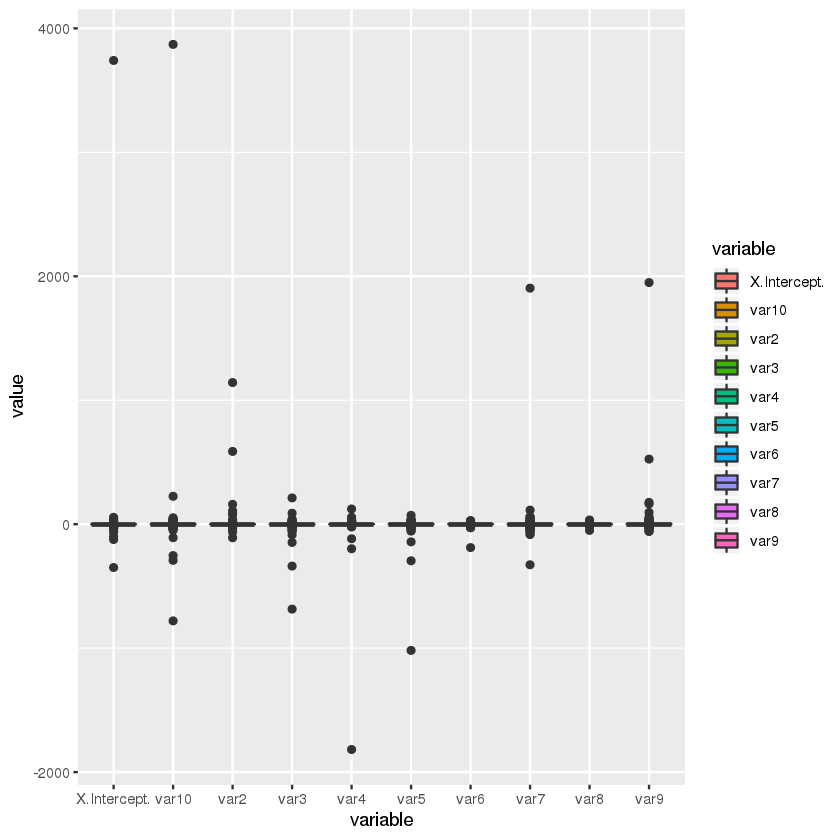

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4356 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 10 rows containing missing values (geom_bar).”


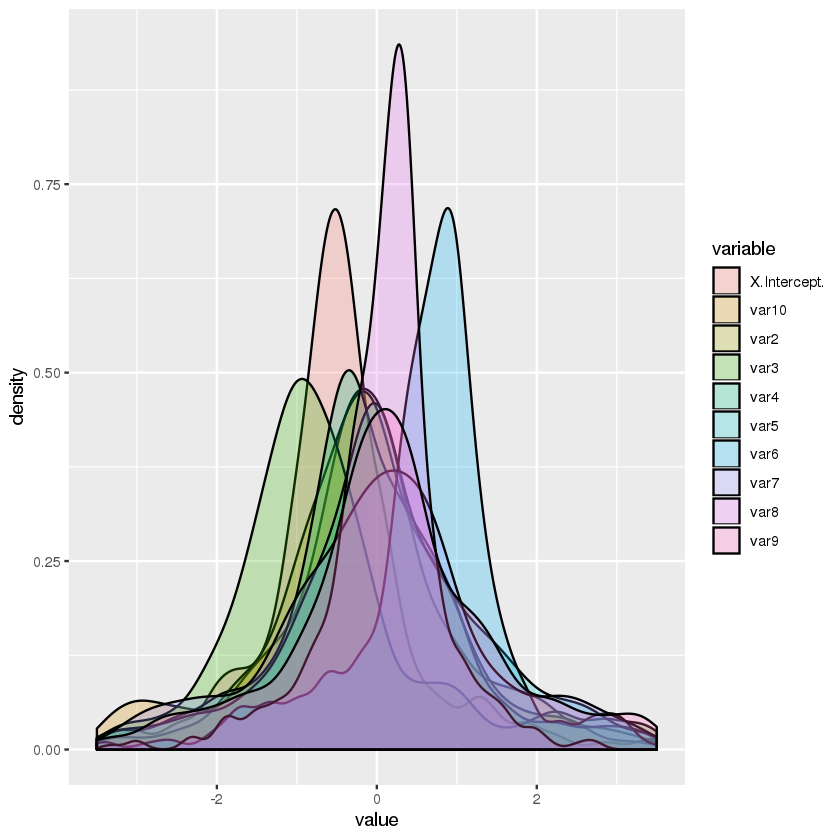

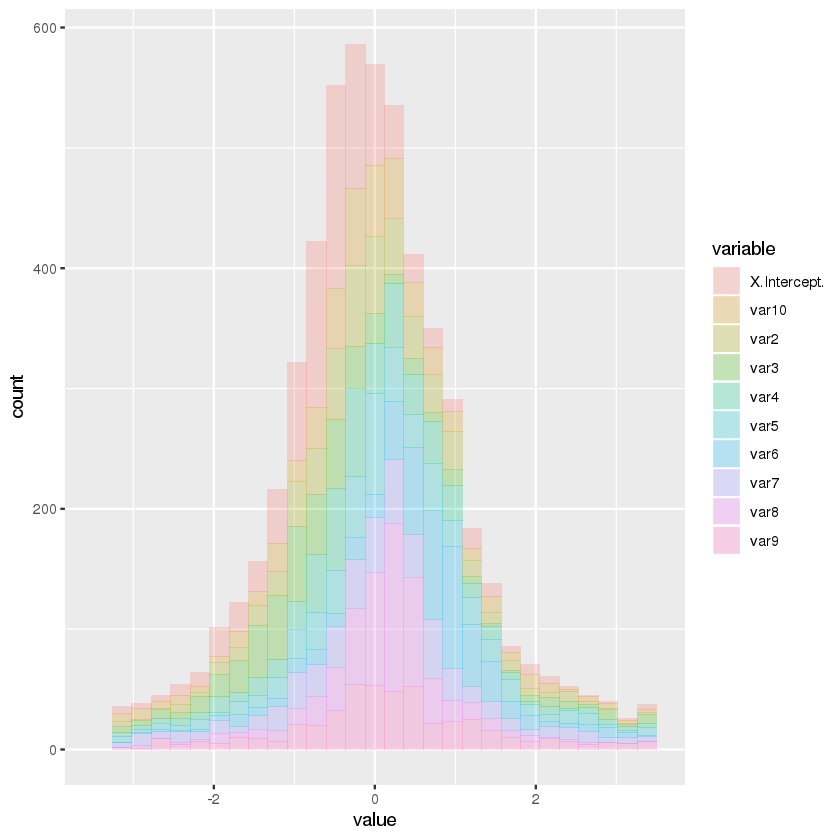

In [89]:
ggplot(coef_mat_accum_df,aes(x=variable, y=value, fill=variable)) + geom_boxplot()
ggplot(coef_mat_accum_df,aes(x=value, fill=variable)) + geom_density(alpha=0.25) + xlim(-3.5,3.5)
ggplot(coef_mat_accum_df,aes(x=value, fill=variable)) + geom_histogram(alpha=0.25) + xlim(-3.5, 3.5)

In [80]:
library(boot)
colnames(x_df)<-names(coef_out)[order(names(coef_out))]
colnames(x_df)[1]<-"var1"
boot.fit<-boot(x_df, lm_function, R=1000)

In [261]:
boot.fit


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = x_df, statistic = lm_function, R = 1000)


Bootstrap Statistics :
       original     bias    std. error
t1*  0.05455883 -0.3377870   38.870288
t2* -0.32386327 -1.5152767   52.750595
t3*  0.52600103 -0.8666860   27.513747
t4* -0.14773894  0.6826516   22.876283
t5*  0.30558341  1.1939137   24.403811
t6*  0.07723468  0.1519875   15.487021
t7*  0.37399186  1.6918271   30.381167
t8* -0.56801138 -0.4572008    5.067553
t9*  0.49406399  3.0677656   11.881779

In [90]:
apply(boot.fit$t, 2, sd, na.rm=TRUE)

[1]  24.4494798  18.7647677 186.9938243 222.1964421 108.4738613  26.0064127
 [7]  65.8354937  10.1084300   0.9555992          NA

In [91]:
boot.ci(boot.fit,  t0 = boot.fit$t0[2], t = boot.fit$t[,2], type="perc")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot.fit, type = "perc", t0 = boot.fit$t0[2], 
    t = boot.fit$t[, 2])

Intervals : 
Level     Percentile     
95%   (-10.6344,   8.3859 )  
Calculations and Intervals on Original Scale